In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest
import numpy as np


In [2]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [30]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'general_locomotion.csv')
df.path_length = df.path_length/1000
df = df[df.day=='D1']
df
# df

,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,search_area,thigmotaxis
0,Tg102_D1,tg,D1,2.863691,4.315799,13.456118,21.849311,0.123292,37.933333
2,Tg103_D1,tg,D1,2.577247,4.303752,13.776957,6.687920,0.035592,342.733333
4,Tg104_D1,tg,D1,2.571390,4.250983,13.196852,7.470793,0.074317,1774.233333
6,Tg105_D1,tg,D1,4.231299,4.649838,14.660602,6.847991,0.052392,70.033333
8,Tg106_D1,tg,D1,2.125159,4.514121,13.530253,8.800542,0.091116,1666.466667
10,Tg108_D1,tg,D1,4.065887,4.758683,15.194739,7.896055,0.194191,999.000000
12,Tg109_D1,tg,D1,4.012926,4.690150,14.952556,7.150948,0.159453,467.300000
14,Tg110_D1,tg,D1,4.341622,4.825915,14.979580,7.546775,0.156036,1771.066667
16,Tg111_D1,tg,D1,4.950236,4.663225,15.042217,6.489288,0.150342,1430.833333
18,Tg112_D1,tg,D1,4.799565,4.606794,14.765441,7.352037,0.177392,735.266667


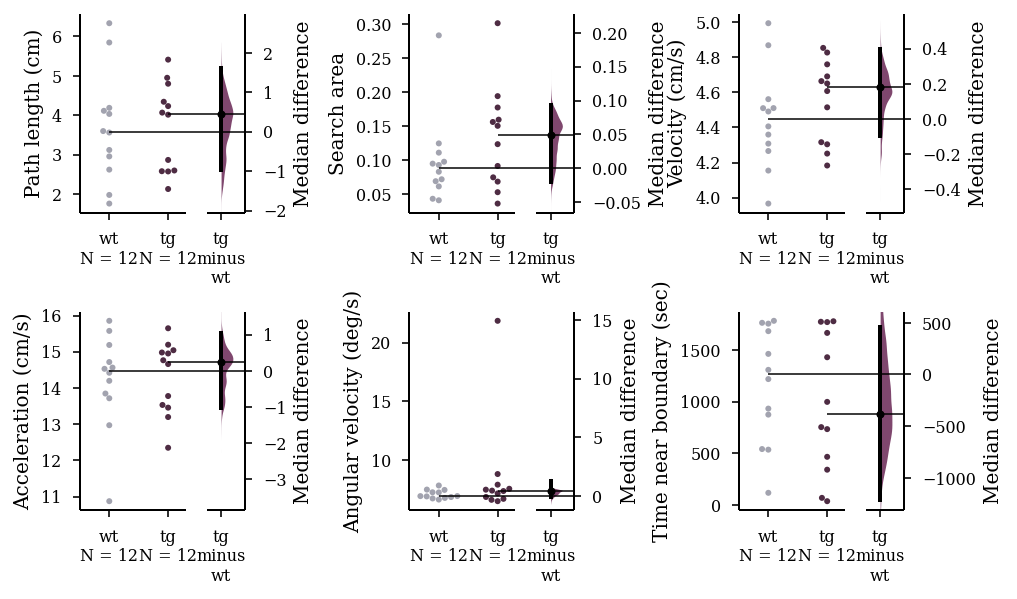

In [32]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="path_length")
dabest_obj.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Path length (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="search_area")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Search area")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_velocity")
dabest_obj.median_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Velocity (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_acceleration")
dabest_obj.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Acceleration (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_angular_velocity")
dabest_obj.median_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[4].set_ylabel("Angular velocity (deg/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="thigmotaxis")
dabest_obj.median_diff.plot(ax=axs[5],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[5].set_ylabel("Time near boundary (sec)")


plt.savefig(fig_save_path+'locomotion_d1.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'locomotion_d1.png',dpi=300,bbox_inches='tight')


In [33]:
df = pd.read_csv(data_path+'general_locomotion.csv')
df.path_length = df.path_length/1000
df = df[df.day=='D2']
df

,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,search_area,thigmotaxis
1,Tg102_D2,tg,D2,1.332770,3.989007,12.453811,7.864080,0.028189,1780.666667
3,Tg103_D2,tg,D2,2.020260,4.247105,13.713404,8.268040,0.072608,1736.166667
5,Tg104_D2,tg,D2,1.448005,3.970336,12.078644,8.565091,0.040718,1785.766667
7,Tg105_D2,tg,D2,4.160301,4.553739,14.299449,7.290135,0.222380,1704.133333
9,Tg106_D2,tg,D2,1.423288,4.087516,12.480729,6.334668,0.042711,1759.433333
11,Tg108_D2,tg,D2,2.773586,4.207099,12.832268,7.623487,0.063497,1787.600000
13,Tg109_D2,tg,D2,2.747062,4.484876,14.661684,7.027309,0.128986,1775.100000
15,Tg110_D2,tg,D2,3.250700,4.419708,13.396888,5.376270,0.121014,1788.533333
17,Tg111_D2,tg,D2,8.970265,5.959488,18.747033,6.595489,0.380410,1713.000000
19,Tg112_D2,tg,D2,5.685595,4.604238,14.631623,6.006712,0.268793,1773.333333


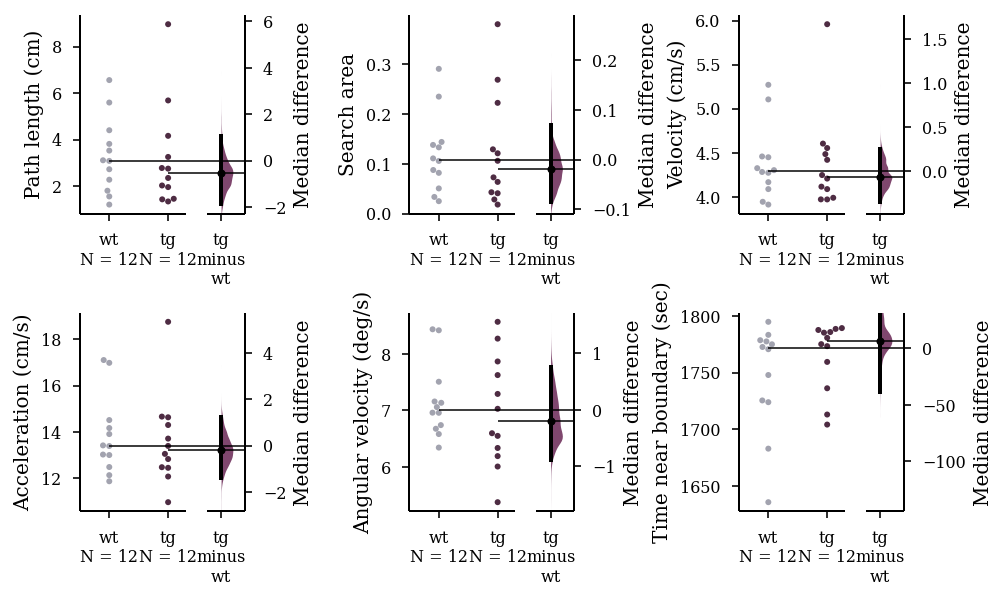

In [34]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="path_length")
dabest_obj.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Path length (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="search_area")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Search area")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_velocity")
dabest_obj.median_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Velocity (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_acceleration")
dabest_obj.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Acceleration (cm/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_abs_angular_velocity")
dabest_obj.median_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[4].set_ylabel("Angular velocity (deg/s)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="thigmotaxis")
dabest_obj.median_diff.plot(ax=axs[5],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[5].set_ylabel("Time near boundary (sec)")


plt.savefig(fig_save_path+'locomotion_d2.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'locomotion_d2.png',dpi=300,bbox_inches='tight')
